# Reference
https://pyimagesearch.com/2014/06/30/super-fast-color-transfer-images/

In [47]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

In [48]:
def image_stats(image):
    # split image into 3 channel, b,g,r
    l, a, b = cv2.split(image)
    l_mean, l_std = l.mean(), l.std()
    a_mean, a_std = a.mean(), a.std()
    b_mean, b_std = b.mean(), b.std()
    
    return (
        l_mean, l_std,
        a_mean, a_std,
        b_mean, b_std
    )

def color_transfer(source, target):
    source = cv2.cvtColor(source, cv2.COLOR_RGB2Lab).astype('float32')
    target = cv2.cvtColor(target, cv2.COLOR_RGB2LAB).astype('float32')
    
    sl_mean, sl_std, sa_mean, sa_std, sb_mean, sb_std = image_stats(source)
    tl_mean, tl_std, ta_mean, ta_std, tb_mean, tb_std = image_stats(target)
    
    l, a, b = cv2.split(target)
    l -= tl_mean
    a -= ta_mean
    b -= tb_mean
    
    l = (tl_std / sl_std) * l
    a = (ta_std / sa_std) * a
    b = (tb_std / sb_std) * b
    
    l += sl_mean
    a += sa_mean
    b += sb_mean
    
    # convert value to range 0 - 255
    l = np.clip(l, 0, 255)
    a = np.clip(a, 0, 255)
    b = np.clip(b, 0, 255)
    
    # merge back and convert back to uint8
    transfer = cv2.merge([l, a, b])
    transfer = cv2.cvtColor(transfer.astype('uint8'), cv2.COLOR_Lab2BGR)
    
    return transfer
    
    

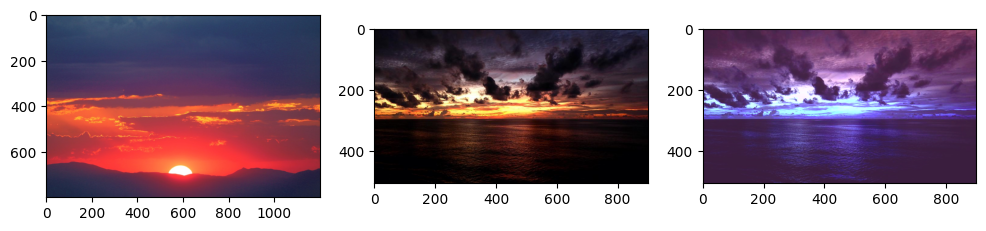

In [49]:
source = cv2.imread('../resources/color_transfer_sample1.jpg')
target = cv2.imread('../resources/color_transfer_sample2.jpg')
transfer = color_transfer(source, target)

fig = plt.figure(figsize=(12,8))
for i, img in enumerate([source, target, transfer]):        
    fig.add_subplot(1,3, i + 1)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
